# Principal Component Analysis(PCA)

As the number of features or dimensions in a dataset increases, the amount of data required to obtain a statistically significant result increases exponentially. This can lead to issues such as overfitting, increased computation time, and reduced accuracy of machine learning models this is known as the curse of dimensionality problems that arise while working with high-dimensional data.

As the number of dimensions increases, the number of possible combinations of features increases exponentially, which makes it computationally difficult to obtain a representative sample of the data and it becomes expensive to perform tasks such as clustering or classification because it becomes. Additionally, some machine learning algorithms can be sensitive to the number of dimensions, requiring more data to achieve the same level of accuracy as lower-dimensional data.

To address the curse of dimensionality, Feature engineering techniques are used which include feature selection and feature extraction. Dimensionality reduction is a type of feature extraction technique that aims to reduce the number of input features while retaining as much of the original information as possible.

__What is Principal Component Analysis(PCA)?__

Principal Component Analysis(PCA) technique was introduced by the mathematician Karl Pearson in 1901. It works on the condition that while the data in a higher dimensional space is mapped to data in a lower dimension space, the variance of the data in the lower dimensional space should be maximum. 

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables.PCA is the most widely used tool in exploratory data analysis and in machine learning for predictive models. Moreover, 
PCA is an unsupervised learning algorithm technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit. 


The main goal of Principal Component Analysis (PCA) is to reduce the dimensionality of a dataset while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables. 


Principal Component Analysis (PCA) is used to reduce the dimensionality of a data set by finding a new set of variables, smaller than the original set of variables, retaining most of the sample’s information, and useful for the regression and classification of data.

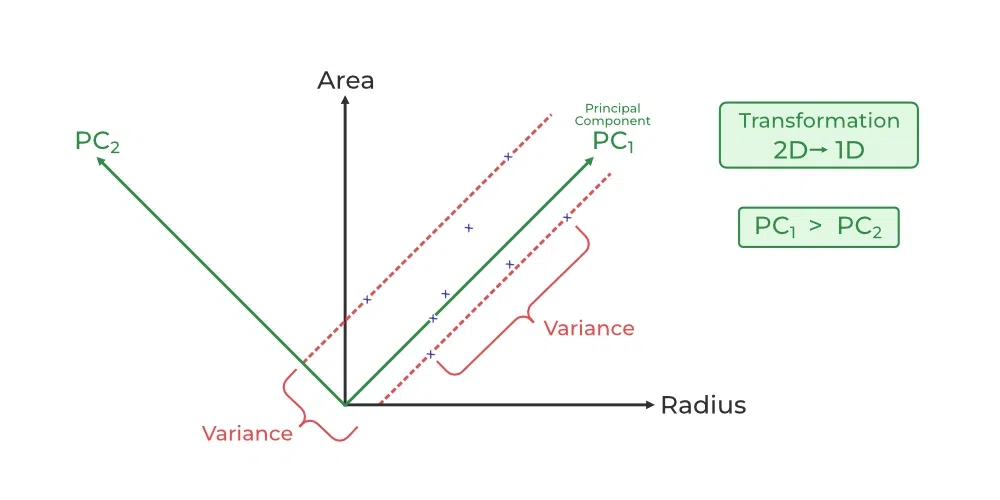

* PCA is a technique for dimensionality reduction that identifies a set of orthogonal axes, called principal components, that capture the maximum variance in the data. The principal components are linear combinations of the original variables in the dataset and are ordered in decreasing order of importance. The total variance captured by all the principal components is equal to the total variance in the original dataset.

* The first principal component captures the most variation in the data, but the second principal component captures the maximum variance that is orthogonal to the first principal component, and so on. 

* PCA can be used for a variety of purposes, including data visualization, feature selection, and data compression. In data visualization, PCA can be used to plot high-dimensional data in two or three dimensions, making it easier to interpret. In feature selection, PCA can be used to identify the most important variables in a dataset. In data compression, PCA can be used to reduce the size of a dataset without losing important information.

* In PCA, it is assumed that the information is carried in the variance of the features, that is, the higher the variation in a feature, the more information that features carries.

Overall, PCA is a powerful tool for data analysis and can help to simplify complex datasets, making them easier to understand and work with.

__Step-By-Step Explanation of Principal Component Analysis(PCA)__

__Standardization__

First, we need to standardize our dataset to ensure that each variable has a mean of 0 and a standard deviation of 1.

![title](img/pca1.svg)

__Covariance Matrix Computation__

Covariance measures the strength of joint variability between two or more variables, indicating how much they change in relation to each other. To find the covariance we can use the formula:

![title](img/pca2.svg)

The value of covariance can be positive, negative, or zeros.

Positive: As the x1 increases x2 also increases.

Negative: As the x1 increases x2 also decreases.

Zeros: No direct relation

__How Principal Component Analysis(PCA) works?__

Hence, PCA employs a linear transformation that is based on preserving the most variance in the data using the least number of dimensions. It involves the following steps:


In [1]:
import pandas as pd
import numpy as np

# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer

# instantiating
cancer = load_breast_cancer(as_frame=True)
# creating dataframe
df = cancer.frame

# checking shape
print('Original Dataframe shape :',df.shape)

# Input features
X = df[cancer['feature_names']]
print('Inputs Dataframe shape :', X.shape)


Original Dataframe shape : (569, 31)
Inputs Dataframe shape : (569, 30)


In [2]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Now we will apply the first most step which is to standardize the data and for that, we will have to first calculate the mean and standard deviation of each feature in the feature space.

In [3]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std


In [4]:
Z

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


The covariance matrix helps us visualize how strong the dependency of two features with each other in the feature space.



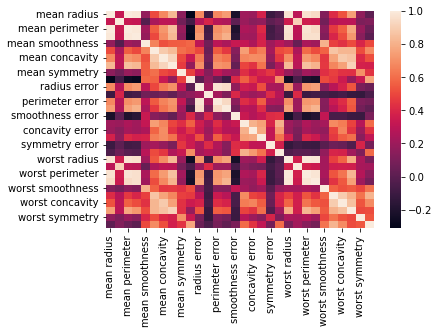

In [5]:
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()


Now we will compute the eigenvectors and eigenvalues for our feature space which serve a great purpose in identifying the principal components for our feature space.



In [6]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)


Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


In [7]:
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]


Explained variance is the term that gives us an idea of the amount of the total variance which has been retained by selecting the principal components instead of the original feature space.



In [8]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

Determine the Number of Principal Components 

Here we can either consider the number of principal components of any value of our choice or by limiting the explained variance. Here I am considering explained variance more than equal to 50%. Let’s check how many principal components come into this.

In [9]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components


2

Project the Data onto the Selected Principal Components

Find the projection matrix, It is a matrix of eigenvectors corresponding to the largest eigenvalues of the covariance matrix of the data. it projects the high-dimensional dataset onto a lower-dimensional subspace

The eigenvectors of the covariance matrix of the data are referred to as the principal axes of the data, and the projection of the data instances onto these principal axes are called the principal components. 

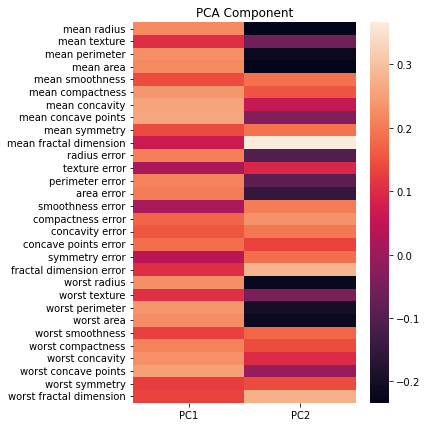

In [10]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
							index = cancer['feature_names'],
							columns = ['PC1','PC2']
							)

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()


Then, we project our dataset using the formula:  

![title](img/pca3.svg)


Dimensionality reduction is then obtained by only retaining those axes (dimensions) that account for most of the variance, and discarding all others.

![title](img/pca4.webp)


In [13]:
# Matrix multiplication or dot Product

Z_pca = Z @ pca_component

Z_pca = pd.DataFrame(Z_pca.values,
					columns = ['PCA1','PCA2']
							)
Z_pca.head()


,PCA1,PCA2
0,9.184755,1.946870
1,2.385703,-3.764859
2,5.728855,-1.074229
3,7.116691,10.266556
4,3.931842,-1.946359


The eigenvectors of the covariance matrix of the data are referred to as the principal axes of the data, and the projection of the data instances onto these principal axes are called the principal components. Dimensionality reduction is then obtained by only retaining those axes (dimensions) that account for most of the variance, and discarding all others.

There are different libraries in which the whole process of the principal component analysis has been automated by implementing it in a package as a function and we just have to pass the number of principal components which we would like to have. Sklearn is one such library that can be used for the PCA as shown below.

In [14]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
					columns=['PC{}'.
					format(i+1)
						for i in range(n_components)])
df_pca1.head()


,PC1,PC2
0,9.184755,1.946870
1,2.385703,-3.764859
2,5.728855,-1.074229
3,7.116691,10.266556
4,3.931842,-1.946359


We can match from the above Z_pca result from it is exactly the same values.



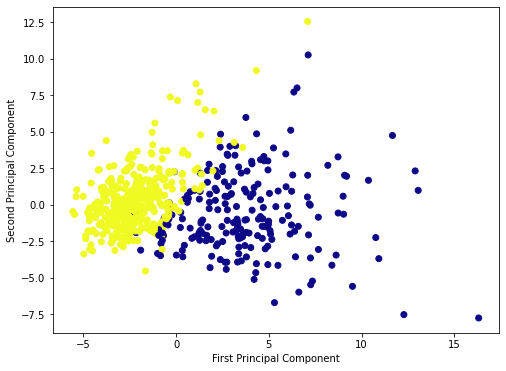

In [15]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
			c=cancer['target'],
			cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [16]:
# components
pca.components_


array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

__Advantages of Principal Component Analysis__

__Dimensionality Reduction:__

PCA is a popular technique used for dimensionality reduction, which is the process of reducing the number of variables in a dataset. By reducing the number of variables, PCA simplifies data analysis, improves performance, and makes it easier to visualize data.

__Feature Selection:__

PCA can be used for feature selection, which is the process of selecting the most important variables in a dataset. This is useful in machine learning, where the number of variables can be very large, and it is difficult to identify the most important variables.

__Data Visualization:__

PCA can be used for data visualization. By reducing the number of variables, PCA can plot high-dimensional data in two or three dimensions, making it easier to interpret.

__Multicollinearity:__

PCA can be used to deal with multicollinearity, which is a common problem in a regression analysis where two or more independent variables are highly correlated. PCA can help identify the underlying structure in the data and create new, uncorrelated variables that can be used in the regression model.

__Noise Reduction:___

PCA can be used to reduce the noise in data. By removing the principal components with low variance, which are assumed to represent noise, PCA can improve the signal-to-noise ratio and make it easier to identify the underlying structure in the data.

__Data Compression:__

PCA can be used for data compression. By representing the data using a smaller number of principal components, which capture most of the variation in the data, PCA can reduce the storage requirements and speed up processing.

__Outlier Detection:__

PCA can be used for outlier detection. Outliers are data points that are significantly different from the other data points in the dataset. PCA can identify these outliers by looking for data points that are far from the other points in the principal component space.


__Disadvantages of Principal Component Analysis__


__Interpretation of Principal Components:__

The principal components created by PCA are linear combinations of the original variables, and it is often difficult to interpret them in terms of the original variables. This can make it difficult to explain the results of PCA to others.

__Data Scaling:__

PCA is sensitive to the scale of the data. If the data is not properly scaled, then PCA may not work well. Therefore, it is important to scale the data before applying PCA.

__Information Loss:__

PCA can result in information loss. While PCA reduces the number of variables, it can also lead to loss of information. The degree of information loss depends on the number of principal components selected. Therefore, it is important to carefully select the number of principal components to retain.

__Non-linear Relationships:__

PCA assumes that the relationships between variables are linear. However, if there are non-linear relationships between variables, PCA may not work well.

__Computational Complexity:__

Computing PCA can be computationally expensive for large datasets. This is especially true if the number of variables in the dataset is large.

__Overfitting:__

PCA can sometimes result in overfitting, which is when the model fits the training data too well and performs poorly on new data. This can happen if too many principal components are used or if the model is trained on a small dataset.